Imports

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]

    return cropped_img

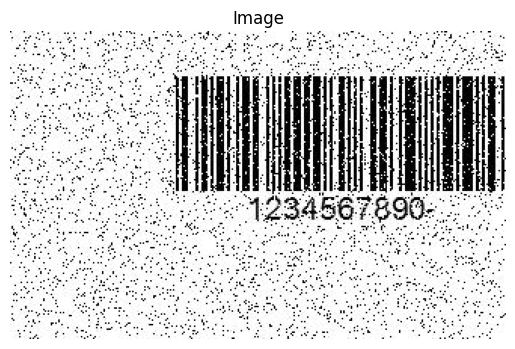

In [36]:
img = cv.imread('Samples/image1.jpg', cv.IMREAD_GRAYSCALE)

# Display the image 
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')  
plt.show()

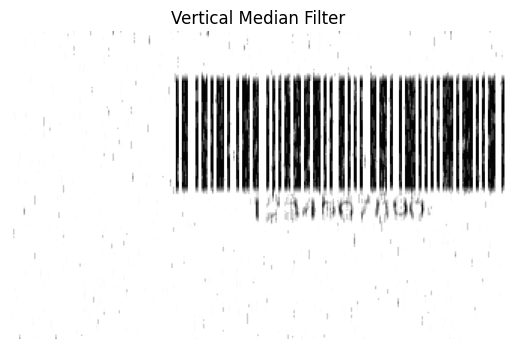

In [37]:
# Apply Median Filter vertically only
kernel = np.ones((7,1),np.float32)/5
median_blurred_img = cv.filter2D(img,-1,kernel)

# Display the image
plt.imshow(median_blurred_img, cmap='gray')
plt.title('Vertical Median Filter')
plt.axis('off')
plt.show()

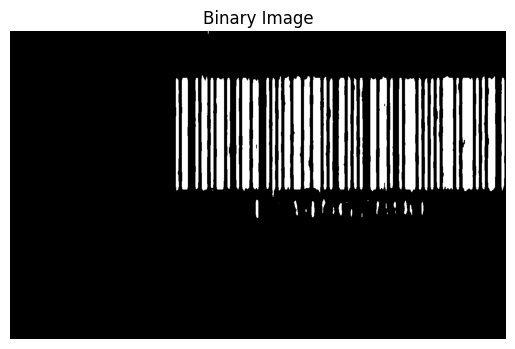

In [38]:
# Resize the image to increase its dimensions
scale_factor = 4  # Adjust the scale factor as needed
resized_img = cv.resize(median_blurred_img, (median_blurred_img.shape[1] * scale_factor, median_blurred_img.shape[0] * scale_factor))
# Binarize the image using a threshold
_, binary_img = cv.threshold(resized_img, 128, 255, cv.THRESH_BINARY_INV)

# Display the image
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

In [39]:
kernel_height1 = 11
kernel_width1 = 11  
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1

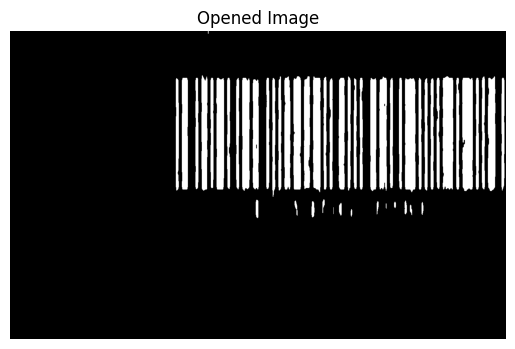

In [40]:
binary_img1 = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel1)
plt.imshow(binary_img1, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.show()

In [41]:
kernel_height1 = 21  
kernel_width1 = 21 
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1  

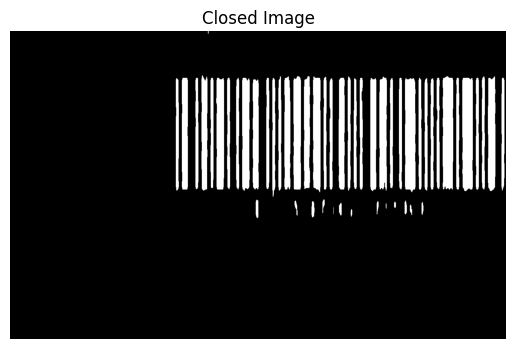

In [42]:
binary_img = cv.morphologyEx(binary_img1, cv.MORPH_CLOSE, kernel1)
plt.imshow(binary_img, cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.show()

In [43]:
kernel_height2 = 1 
kernel_width2 = 5  
kernel2 = np.ones((kernel_height2, kernel_width2), np.uint8)

In [44]:
binary_img = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel2)

In [45]:
cropped_img = crop_barcode(binary_img)

In [46]:
# Create a vertical kernel (all 1's vertically)
kernel_vertical = np.ones((17, 1), np.uint8)  # Adjust the height as needed

In [47]:
# Apply dilation with the vertical kernel
dilated_img = cv.dilate(cropped_img, kernel_vertical)
final_img = cv.morphologyEx(cropped_img, cv.MORPH_CLOSE, kernel1)

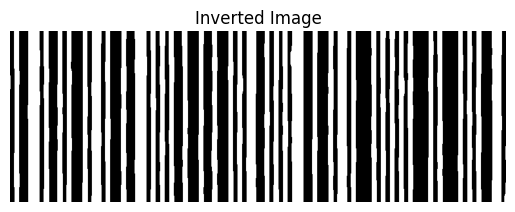

In [48]:
# Invert 
inverted_img = cv.bitwise_not(final_img)
plt.imshow(inverted_img, cmap='gray')
plt.title('Inverted Image')
plt.axis('off')
plt.show()